In [3]:
%matplotlib inline

from random import randint

from enum import Enum

import matplotlib.pyplot as plt

In [4]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 0

In [7]:
def play_game(strategie):
    
    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    premier_choix = randint(0,2)
    
    portes.remove(premier_choix)
    
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else: 
        portes = [bonne_porte]
        
    deuxieme_choix = 0
    
    if (strategie == Strategie.GARDER):
        deuxieme_choix = premier_choix
    else:
        deuxieme_choix = portes[0]
        
    return deuxieme_choix == bonne_porte
        

In [16]:
play_game(Strategie.CHANGER)

True

In [17]:
def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [23]:
sum(play(Strategie.GARDER, 1000))

333

In [28]:
sum(play(Strategie.CHANGER, 1000))

673

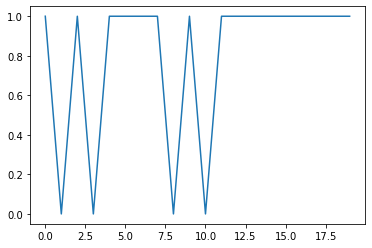

In [30]:
plt.plot(play(Strategie.CHANGER, 20))

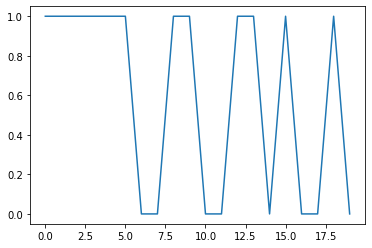

In [31]:
plt.plot(play(Strategie.CHANGER, 20))

<BarContainer object of 2 artists>

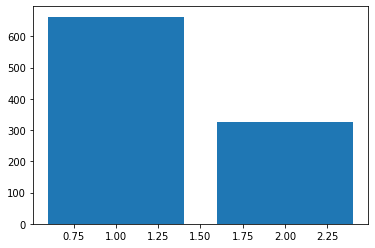

In [32]:
plt.bar([1,2], [sum(play(Strategie.CHANGER, 1000)), sum(play(Strategie.GARDER, 1000))])

In [33]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

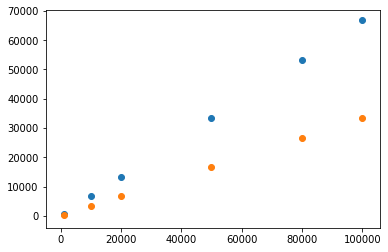

In [34]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])